## Setup

In [210]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 100

In [211]:
def plotMagnetization(dt, M):
    time_vector = np.array(range(len(M)))*dt
    plt.plot(time_vector, np.array(M)[:,0])
    plt.plot(time_vector, np.array(M)[:,1])
    plt.plot(time_vector, np.array(M)[:,2])
    plt.ylabel("Magnetization")
    plt.xlabel("Time (ms)")
    plt.legend(['Mx', 'My', 'Mz'])
    plt.ylim([np.array(M).min() - 0.1, np.array(M).max() + 0.1])

def excitation(M, dt, duration, flip_angle):
    dTheta = np.deg2rad(flip_angle) * dt / duration
    
    A = np.array([
        [1, 0, 0],
        [0, np.cos(dTheta), -np.sin(dTheta)],
        [0, np.sin(dTheta),  np.cos(dTheta)],
    ])

    for _ in range(int(duration/dt)):
        M.append(A @ M[-1])

def relaxation(M, dt, duration):
    A = np.array([
        [np.exp(-dt/T2), 0, 0],
        [0, np.exp(-dt/T2), 0],
        [0, 0, np.exp(-dt/T1)],
    ])

    B = np.array([
        0,
        0,
        1*(1 - np.exp(-dt/T1))
    ])

    for _ in range(int(duration/dt)):
        M.append(A @ M[-1] + B)

## Declaring constants

In [212]:
# Relevant information
M0 = np.array([0, 0, 1])
dt = 0.1    # ms
T1 = 1500   # ms
T2 = 100    # ms

## Question 1

Excitation (ignoring relaxation) by a 90° flip angle B1 pulse along -x with duration 10 ms.

Text(0.5, 1.0, 'Relaxation following the 90° flip angle excitation')

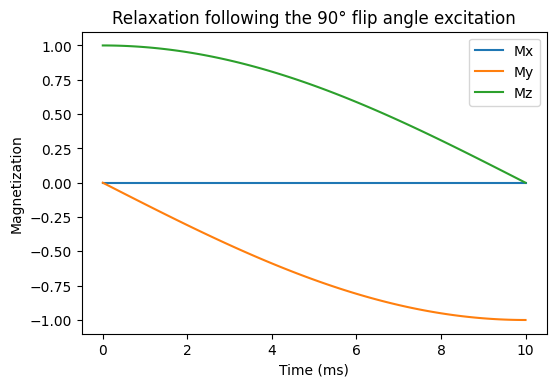

In [225]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Plotting magnetization
plotMagnetization(dt, M)
plt.title("Relaxation following the 90° flip angle excitation")

## Question 2

Relaxation following the 90° excitation simulated in 1., for an observation period of 
790 ms.

Text(0.5, 1.0, 'Relaxation following the 90° flip angle excitation')

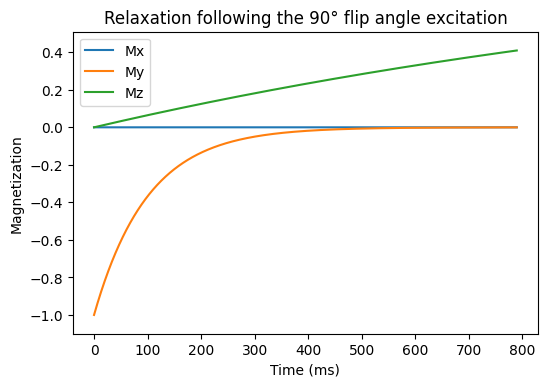

In [226]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Relaxation
relaxation(M, dt, duration = 790)

# Plotting magnetization
plotMagnetization(dt, M[100:])
plt.title("Relaxation following the 90° flip angle excitation")

Try also an observation period of 2990 ms.

Text(0.5, 1.0, 'Relaxation following the 90° flip angle excitation')

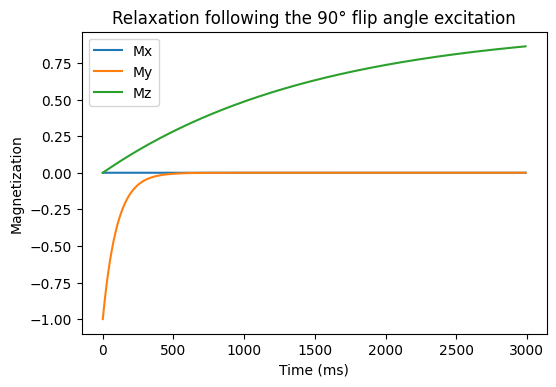

In [227]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 90)

# Relaxation
relaxation(M, dt, duration = 2990)

# Plotting magnetization
plotMagnetization(dt, M[100:])
plt.title("Relaxation following the 90° flip angle excitation")

## Question 3

Repeat 1. 2. for the flip angles 45º and 180º

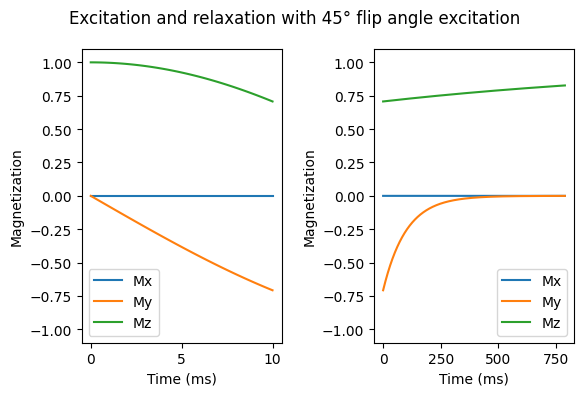

In [230]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 45)

# Plot magnetization
plt.subplot(121)
plotMagnetization(dt, M)
plt.ylim([-1.1, 1.1])

# Relaxation
relaxation(M, dt, duration = 790)

# Plotting magnetization
plt.subplot(122)
plotMagnetization(dt, M[100:])
plt.ylim([-1.1, 1.1])

# Graph configurations
plt.suptitle("Excitation and relaxation with 45° flip angle excitation")
plt.tight_layout()

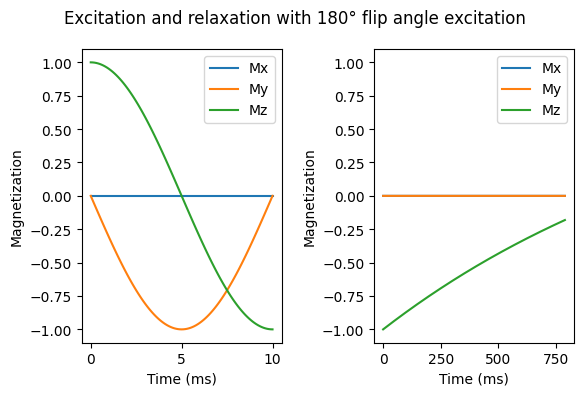

In [232]:
M = [M0]

# Excitation
excitation(M, dt, duration = 10, flip_angle = 180)

# Plot magnetization
plt.subplot(121)
plotMagnetization(dt, M)

# Relaxation
relaxation(M, dt, duration = 790)

# Plot magnetization
plt.subplot(122)
plotMagnetization(dt, M[100:])
plt.ylim([-1.1, 1.1])

# Graph configurations
plt.suptitle("Excitation and relaxation with 180° flip angle excitation")
plt.tight_layout()

## Question 4

Now repeat 3. for a flip angle of 45°, over 10 consecutive cycles of excitation and 
relaxation (repetition time (TR) = 800 ms)

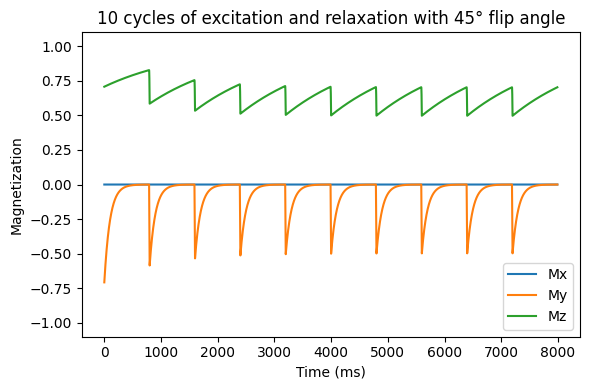

In [237]:
M = [M0]

for _ in range(10):
    # Excitation
    excitation(M, dt, duration = 10, flip_angle = 45)

    # Relaxation
    relaxation(M, dt, duration = 790)

# Plotting magnetization
plotMagnetization(dt, M[100:])
plt.ylim([-1.1, 1.1])

# Graph configurations
plt.title("10 cycles of excitation and relaxation with 45° flip angle")
plt.tight_layout()